# Analisis de componentes principales y análisis de discriminación lineal

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install seaborn

In [3]:
import seaborn as sns

In [7]:
dataset = load_breast_cancer()
X = dataset["data"]
y = dataset["target"]

In [9]:
tabla = pd.DataFrame(data=X, columns=dataset["feature_names"])
tabla

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [14]:
print(tabla.columns)
tabla.describe()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

# Obtener transformación PCA

In [ ]:
1 - Matriz de covarianzas (es una matriz simétrica)
2 - Obtener eigenvalores y eigenvectores de 1
3 - Ordenar los eigenvectores por magnitud de eigenvalores
3 - Construir matriz de transformacion PCA con eigenvectores ordenados

$$\lambda v = [cov]_{nxn} v \\
v \in R^n \\
T_{PCA} = [v1, v2, .. vn] \\
$$

In [18]:
pca = PCA()
X_pca = pca.fit_transform(X)

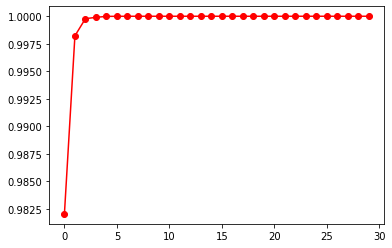

In [26]:
# representacion de varianza relativa para eigenvector
plt.plot(pca.explained_variance_ratio_.cumsum(), "ro-")
plt.show()

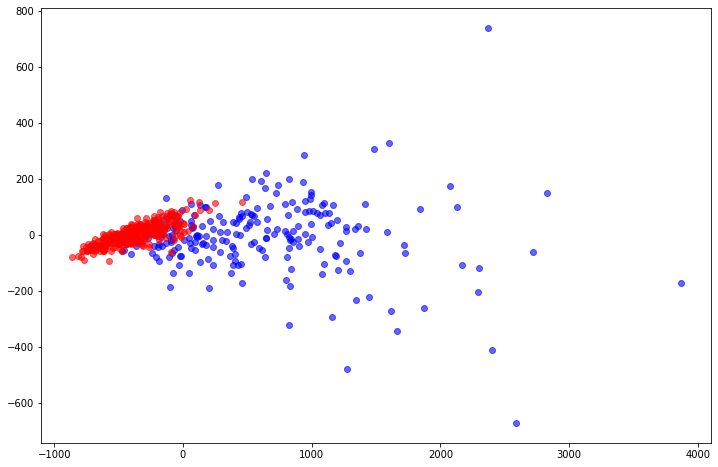

In [34]:
inds0 = y == 0
inds1 = y == 1
plt.figure(figsize=(12,8))
plt.scatter(X_pca[inds0, 0], X_pca[inds0, 1], c="b", alpha=0.6, label="c0")
plt.scatter(X_pca[inds1, 0], X_pca[inds1, 1], c="r", alpha=0.6, label="c1")
plt.show()

#X = df[features].copy()
X = StandardScaler().fit_transform(X)
U, S, V = np.linalg.svd(X.T)

In [16]:
np.linalg.svd?

In [25]:
V.shape

(569, 569)

In [26]:
# eigenvalues
S**2/sum(S**2)

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [104]:
dataset = load_breast_cancer()
X = pd.DataFrame(data=dataset["data"], columns=dataset["feature_names"])

In [105]:
X["Class"] = dataset["target"]

In [76]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Class'],
      dtype='object')

In [31]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Matriz de correlacion
### Enfocarse en las variables con mayor correlacion con la variable dependiente

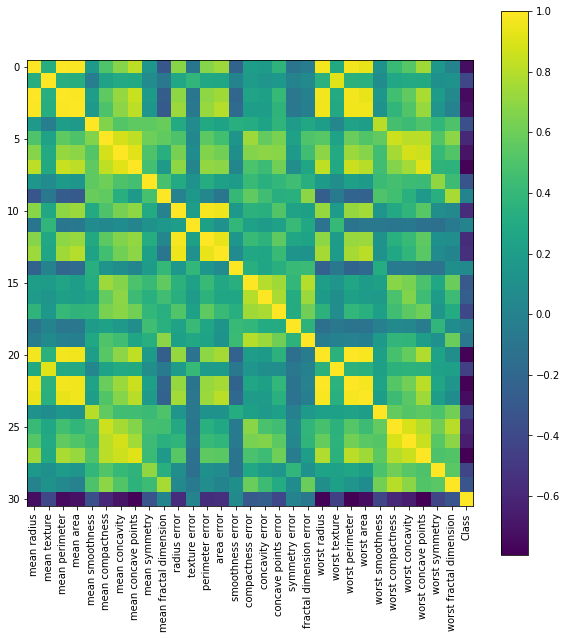

In [75]:
plt.figure(figsize=(10,10))
corre = X.corr()
plt.imshow(corre)
plt.xticks(np.arange(corre.shape[0]), corre.columns, rotation=90)
plt.colorbar()

## Con la libreria seaborn, sale mas facil la grafica

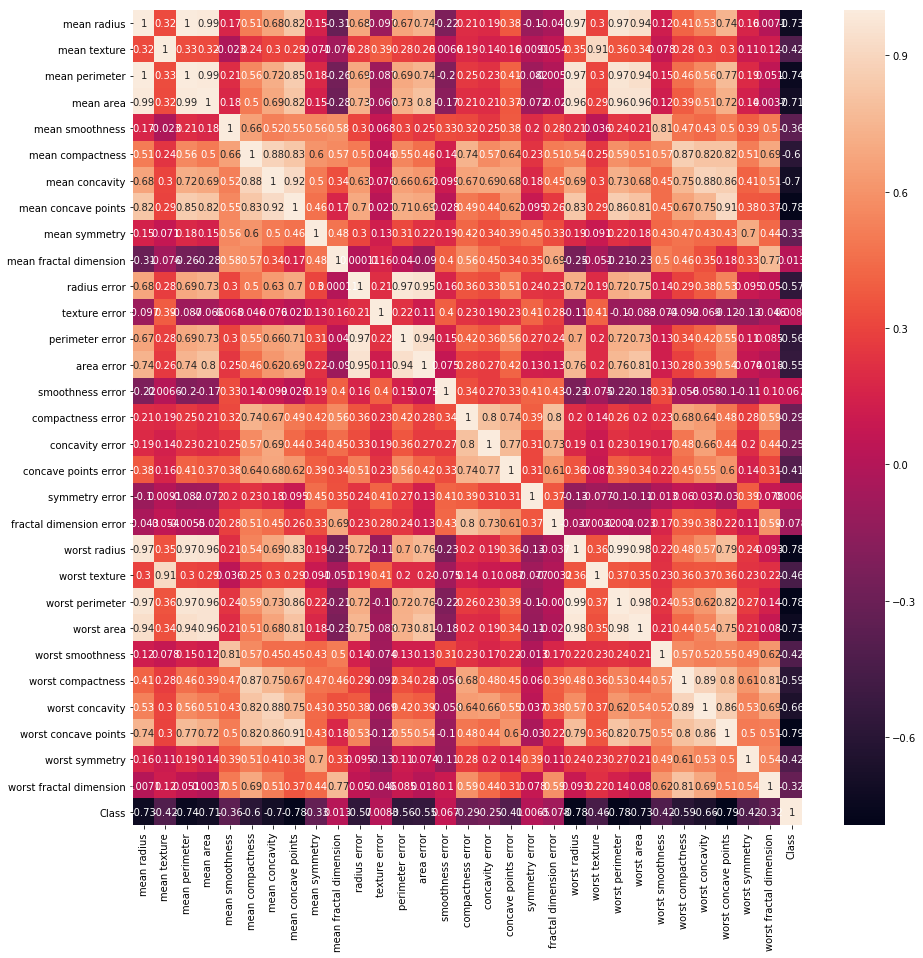

In [116]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(), annot=True)

# Analisis de componentes principales

In [36]:
pca = PCA()
pca_x = pca.fit_transform(X[dataset["feature_names"]])

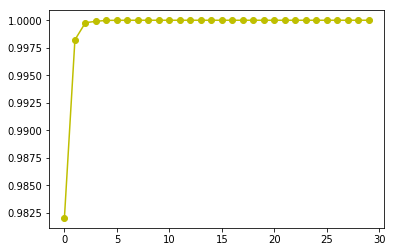

In [37]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-yo')

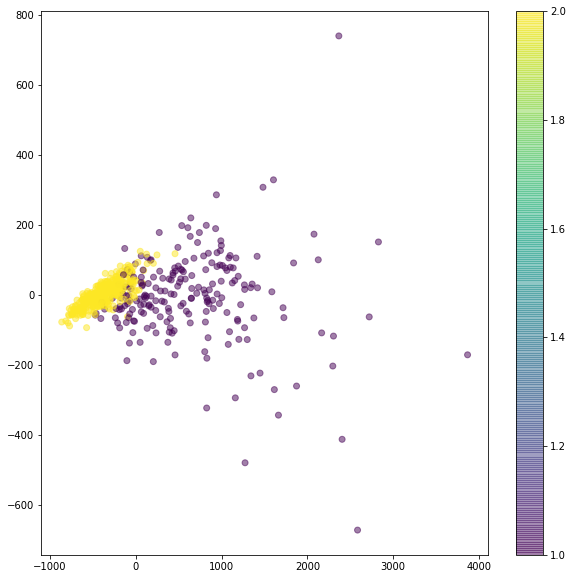

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(pca_x[:, 0], pca_x[:, 1], c=X["Class"] + 1, alpha=0.5)
plt.colorbar()

In [38]:
from mayavi import mlab
from mayavi.mlab import points3d
def test_points3d(x, y, z, s):
    s2 = s / 10
    clases = np.unique(s2)
    for si in clases:
        fil = np.array(list(filter(lambda yi: yi[3]==si, zip(x, y, z, s2))))
        color = (si*10%2, si, 1-si)
        points3d(fil[:, 0], fil[:, 1], fil[:, 2], fil[:, 3], color=color,
                 colormap="copper", scale_factor=.25)
    mlab.show()

In [48]:
test_points3d(pca_x[:, 0], pca_x[:, 1], pca_x[:, 2], X["Class"])

References:
    
- https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/scikit-learn/scikit-learn-pca.ipynb
- scikit learn :   http://scikit-learn.org/stable/modules/decomposition.html#pca
- https://plot.ly/ipython-notebooks/principal-component-analysis/
- http://www.fuenterrebollo.com/Economicas/ECONOMETRIA/SEGMENTACION/DISCRIMINANTE/analisis-discriminante.pdf

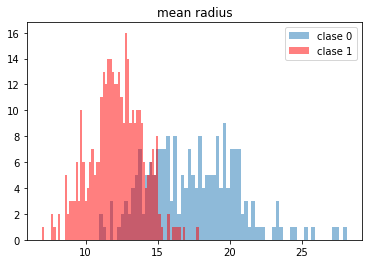

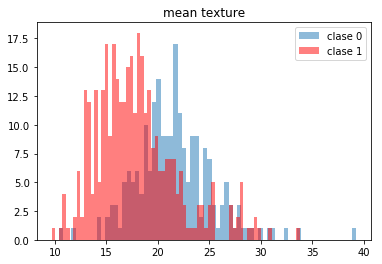

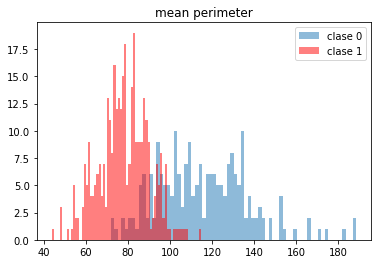

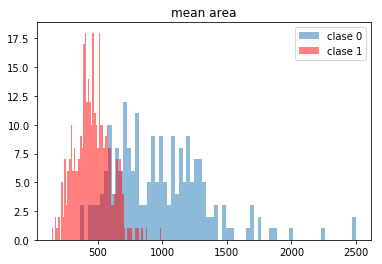

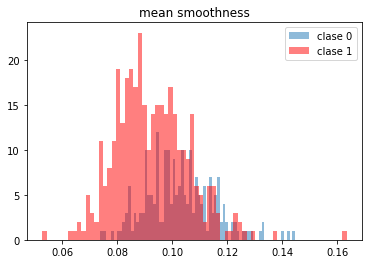

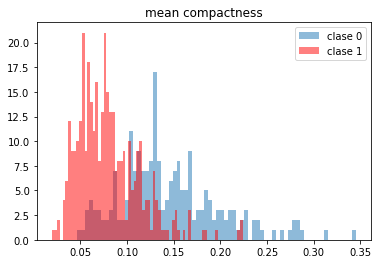

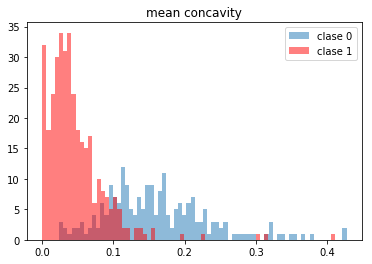

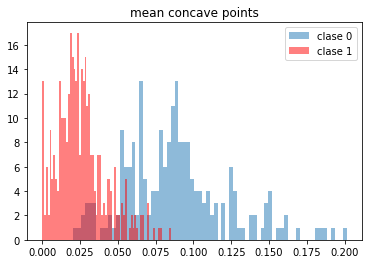

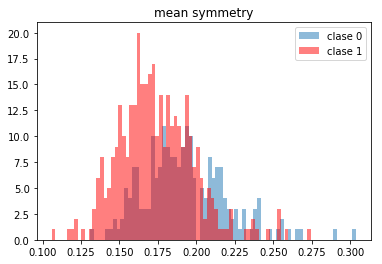

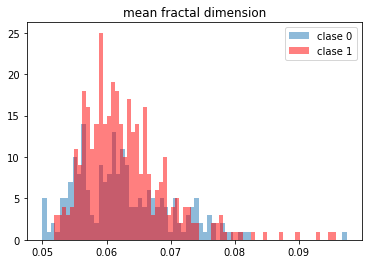

In [78]:
for col in X.columns[:10]:
    plt.figure()
    _ = plt.hist(X.loc[X["Class"] == 0, col], bins=70, alpha=0.5, label="clase 0")
    _ = plt.hist(X.loc[X["Class"] == 1, col], bins=70, color="red", alpha=0.5, label="clase 1")
    plt.title(col)
    plt.legend()
    plt.show()

# Separación entre clases
### Revisar el concepto de colinealidad

In [122]:
X_e = X.columns[:6]
clases = {0:"Cancer", 1:"NoCancer"}
target = X["Class"].apply(lambda x: clases[x])
X_ee = X[X_e]
X_ee.insert(0, "Target", target)

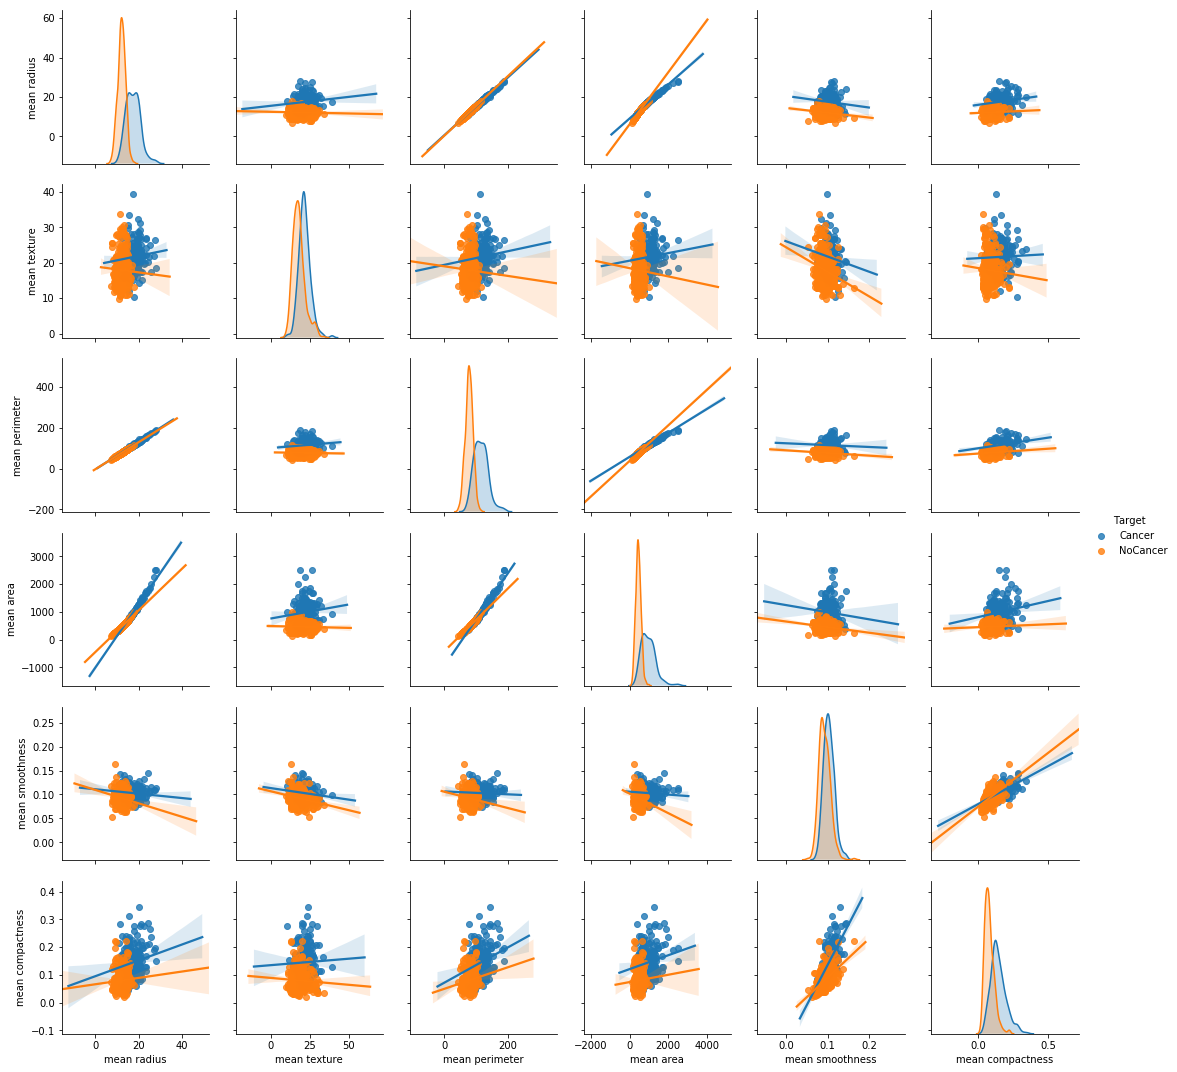

In [123]:
sns.pairplot(X_ee, kind="reg", hue="Target")
plt.show()

# Analisis de discriminacion lineal
### Para dos clases

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [80]:
lda = LinearDiscriminantAnalysis()
lda_x = lda.fit_transform(X[X.columns[:-1]], X["Class"])

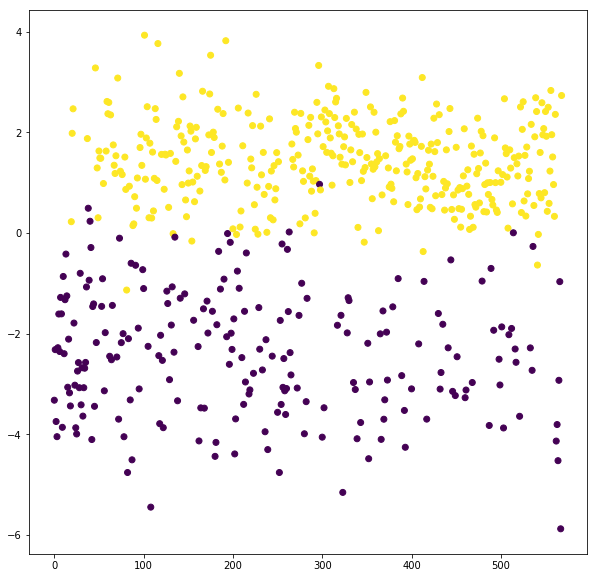

In [83]:
plt.figure(figsize=(10,10))
plt.scatter(np.arange(lda_x.shape[0]), lda_x, c=X["Class"] + 1)